# TRAIN_TEST_SLPIT - KFOLD - STRATIFIED K FOLD CROSS VALIDATION
HYPERPARAMETER OPTIMIZATION FOR XGBOOST USING RANDOMIZEDSEARCHCV

In [1]:
# IMPORT NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# READ THE DATASET

In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# CORRELATION MATRIX

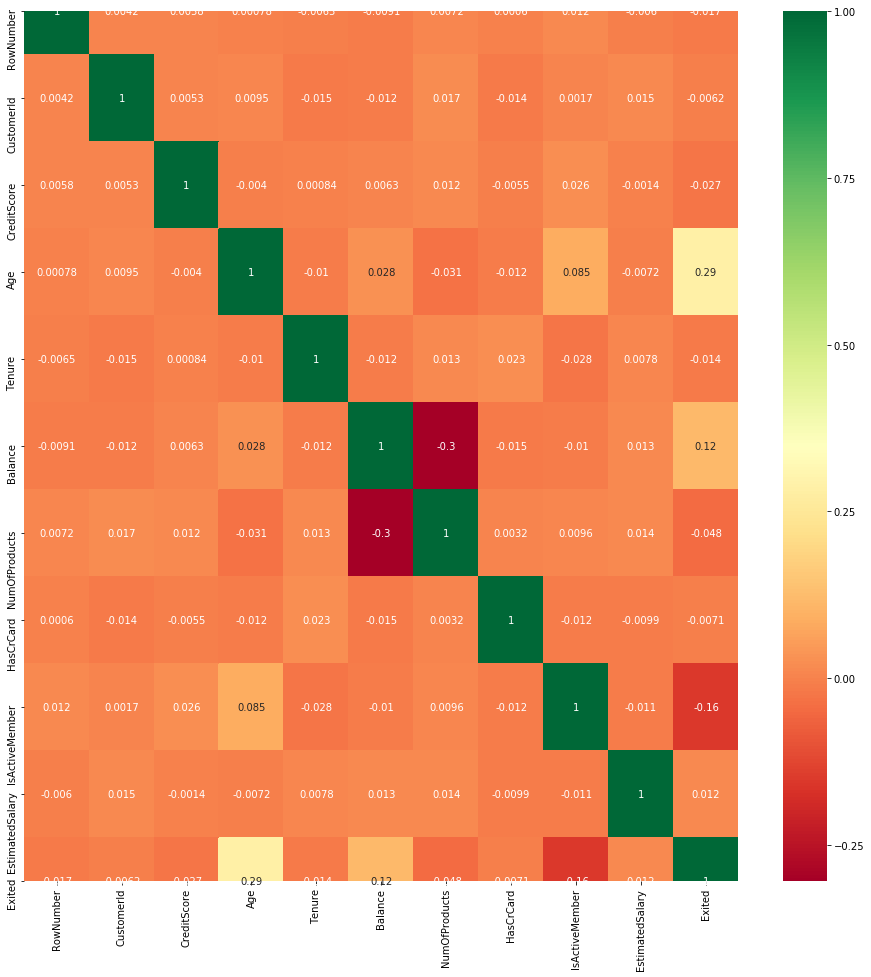

In [7]:
# get correation of each feature in dataset
corrmat=dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(16,16))
# plot the heatmap
hmap=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")




In [8]:
# Divide the dataset into x and y

In [9]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [10]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [12]:
#ENCODING AND CONCAT CATEGORICAL DATA

In [13]:
x1=pd.get_dummies(x['Geography'],drop_first=True)

In [14]:
x1.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [15]:
x2=pd.get_dummies(x['Gender'],drop_first=True)

In [16]:
x2.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [17]:
x=pd.concat([x,x1,x2],axis=1)

In [18]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [19]:
# drop the categorical variables

In [20]:
x=x.drop(['Geography','Gender'],axis=1)

In [21]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [22]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [23]:
# SPLITTING THE DATASET INTO TRAIN AND TEST DATA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
# Huperparameter optimization

In [25]:
params={
    "learning rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,7,8,9,10,11,12],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "columnsample_bytree":[0.3,0.4,0.5,0.7]
}

In [26]:
# Huperparameter optimization with Randomizedsearchcv

In [27]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

In [28]:
def timer(start_time=None):
    if not start_time:
        statrt_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print('\n Time taken: %i hours %i minutes %i seconds.'% (thour,tmin,round(tsec,2)))


In [29]:
# build the xgboost model

In [30]:
classifier=xgboost.XGBClassifier()

In [31]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=6,n_jobs=-1,cv=10,verbose=3)

In [32]:
from datetime import datetime
# here we go
start_time=timer(None) # timing start from this point for "start_time" variable
random_search.fit(x,y)
timer=(start_time) # timing ends here for " start_time" variable

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   54.0s finished


In [33]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [34]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, columnsample_bytree=0.5,
              gamma=0.2, learning rate=0.1, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [35]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning rate': 0.1,
 'gamma': 0.2,
 'columnsample_bytree': 0.5}

In [36]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, columnsample_bytree=0.5,
              gamma=0.0, learning_rate=0.2, max_delta_step=0,
              max_depth=7, min_child_weight=7, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [37]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, columnsample_bytree=0.5,
              gamma=0.0, learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
y_pred=classifier.predict(x_test)

In [39]:
# performance metrics for model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix=confusion_matrix(y_test,y_pred)
accuracy_score=accuracy_score(y_test,y_pred)
classification_report=classification_report(y_test,y_pred)


In [40]:
confusion_matrix

array([[1498,   97],
       [ 187,  218]], dtype=int64)

In [41]:
accuracy_score

0.858

In [42]:


print(classification_report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.69      0.54      0.61       405

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



# CROSS VALIDATION
# K FOLD CROSS VALIDATION

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
score=cross_val_score(classifier,x,y,cv=10)

In [45]:
score

array([0.868, 0.856, 0.858, 0.865, 0.849, 0.852, 0.857, 0.87 , 0.856,
       0.856])

In [46]:
score.mean()

0.8587

In [47]:
# STRATIFIED K FOLD CROSS VALIDATION

In [48]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(x,y): 
    print("Train:", train_index, "Validation:", test_index) 
    x1_train, x1_test = x.loc[train_index], x.loc[test_index] 
    y1_train, y1_test = y.loc[train_index], y.loc[test_index]

Train: [1965 1977 1985 ... 9997 9998 9999] Validation: [   0    1    2 ... 2006 2008 2010]
Train: [   0    1    2 ... 9997 9998 9999] Validation: [1965 1977 1985 ... 4035 4039 4040]
Train: [   0    1    2 ... 9997 9998 9999] Validation: [3840 3841 3843 ... 6031 6032 6033]
Train: [   0    1    2 ... 9997 9998 9999] Validation: [5882 5887 5888 ... 8017 8019 8020]
Train: [   0    1    2 ... 8017 8019 8020] Validation: [7894 7900 7909 ... 9997 9998 9999]


In [49]:
# fit the model kfold data

classifier.fit(x1_train,y1_train)
y1_pred=classifier.predict(x1_test)

In [50]:
# performance metrics for model with kfold
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix=confusion_matrix(y1_test,y1_pred)
accuracy_score=accuracy_score(y1_test,y1_pred)
classification_report=classification_report(y1_test,y1_pred)

In [51]:
confusion_matrix

array([[1513,   80],
       [ 223,  184]], dtype=int64)

In [52]:
accuracy_score

0.8485

In [53]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.70      0.45      0.55       407

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



# STRATIFIED K FOLD CROSS VALIDATION

In [ ]:
x.shape,y.shape

In [ ]:
# import stratified k folder

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,random_state=None)

In [ ]:
skf.split(x,y)

In [ ]:
x.iloc[1991]

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
accuracy=[]

skf=StratifiedKFold(n_splits=5,random_state=None)
# x is the feature set and y is the target
for train_index,test_index in skf.split(x,y):
    print("Train:",train_index,"Validation:",test_index)
    x1_train,x1_test=x.loc[train_index],x.loc[test_index]
    y1_train,y1_test=y.loc[train_index],y.loc[test_index]
    
    classifier.fit(x1_train,y1_train)
    predictions=classifier.predict(x1_test)
    score=accuracy_score(y1_test,predictions)
    accuracy.append(score)
print(accuracy)